In [9]:
import math
import io
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

import scipy.stats
import scipy.optimize
import scipy.spatial

In [41]:
poll = pd.read_csv('опрос.csv')
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [42]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [43]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [44]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [45]:
def sample (brow, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(5) < 0.51, 'Brown', 'Green')})
s = sample(0.51, n=1000)
s.vote.value_counts(normalize=True)

Green    0.6
Brown    0.4
Name: vote, dtype: float64

In [46]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])
dist.head()

,Green,Brown
vote,0.6,0.4
vote,0.6,0.4
vote,0.2,0.8
vote,0.4,0.6
vote,0.4,0.6


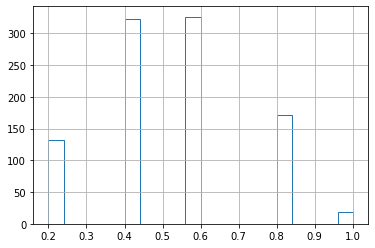

In [47]:
dist.Brown.hist(histtype='step', bins = 20)

In [48]:
def samplingdist (brown, n = 1000): 
    return pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [49]:
def quantiles(brown, n=1000):
    dist = samplingdist(brown, n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)
quantiles(0.50)

(0.2, 1.0)

In [50]:
quantiles(0.48)

(0.2, 1.0)

In [51]:
quantiles(0.52)

(0.2, 1.0)

In [52]:
quantiles(0.54)

(0.2, 1.0)

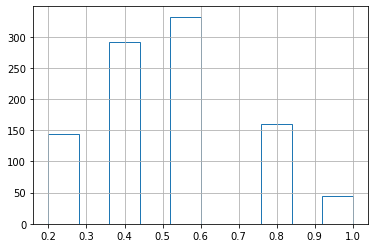

In [53]:
dist = samplingdist(0.50, 10000)
dist.Brown.hist(histtype='step')

In [54]:
largepoll = pd.read_csv('опрос-большой.csv')
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64